In [6]:
print("Ref folder :", os.listdir(REF_DIR))
print("Test folder:", os.listdir(TEST_DIR))


Ref folder : ['test2.jpeg']
Test folder: ['test1.jpeg']


In [7]:
import glob
import os

REF_DIR = "/content/SIFT_Project/data/ref"
TEST_DIR = "/content/SIFT_Project/data/test"

REF_PATH = sorted(glob.glob(os.path.join(REF_DIR, "*.*")))[0]
TEST_PATH = sorted(glob.glob(os.path.join(TEST_DIR, "*.*")))[0]

print("REF_PATH :", REF_PATH)
print("TEST_PATH:", TEST_PATH)


REF_PATH : /content/SIFT_Project/data/ref/test2.jpeg
TEST_PATH: /content/SIFT_Project/data/test/test1.jpeg


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

sift = cv2.SIFT_create(nfeatures=800)

def compute(path):
    bgr = cv2.imread(path)
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    kps, desc = sift.detectAndCompute(gray, None)
    return bgr, kps, desc

ref_bgr, ref_kps, ref_desc = compute(REF_PATH)
test_bgr, test_kps, test_desc = compute(TEST_PATH)

print("Ref keypoints :", len(ref_kps))
print("Test keypoints:", len(test_kps))


Ref keypoints : 800
Test keypoints: 801


In [9]:
bf = cv2.BFMatcher(cv2.NORM_L2)

matches = bf.knnMatch(test_desc, ref_desc, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

print("Good matches:", len(good))


Good matches: 41


In [10]:
THRESHOLD = 30

if len(good) >= THRESHOLD:
    print("✅ MATCH — Objek dikenali")
else:
    print("❌ NOT MATCH — Objek tidak dikenali")


✅ MATCH — Objek dikenali


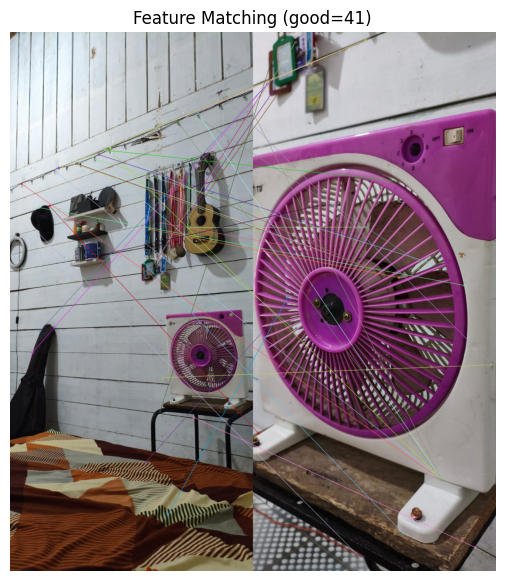

In [11]:
good_sorted = sorted(good, key=lambda m: m.distance)[:80]

out = cv2.drawMatches(
    test_bgr, test_kps,
    ref_bgr, ref_kps,
    good_sorted, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(14,7))
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.title(f"Feature Matching (good={len(good)})")
plt.axis("off")
plt.show()


In [12]:
def count_inliers(kps1, kps2, matches):
    if len(matches) < 4:
        return 0

    pts1 = np.float32([kps1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    pts2 = np.float32([kps2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

    H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
    if mask is None:
        return 0
    return int(mask.sum())

inliers = count_inliers(test_kps, ref_kps, good)
print("Inlier matches:", inliers)


Inlier matches: 5
